This is the final data analysis project which analyzes movie data from a dataset from The Movie Database (TMDb)

### Notes:
1. Certain columns like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
2. There are some odd characters in the ‘cast’(and 'title') column. Don’t worry about cleaning them.


Let's analyze the dataset from TMDB. Before starting analyzing, let's start with the questions we might want to answer:
        1. Which directors' movies tend to make more money at the boxoffice?(a.directors with highest B.O collection, 
                                                                             b. directors with highest average B.O)
        2. Is popularity (vote_count, popularity) on TMDB, a predictor of the film's performance?
        
First, converting the csv to a dataframe using read_csv

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('tmdb-movies.csv')#convert csv data to a pandas dataframe

Now let's drop all rows that have NaN values for these columns: 'cast','production_companies','director'

In [2]:
df = df.dropna(subset=['cast','production_companies','director']) #removing NaN values from these columns
df.head(10) #listing first 10 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

We see that some columns(cast, production companies) have multiple values sepearted by a '|'. Converting them to 
strings seperated by commas will be helpful for further analysis.

In [3]:
 df['cast']=df['cast'].str.split('|').apply(lambda x: ','.join(map(str,x)))#replacing strings seperated by'|' with ','
df['production_companies']=df['production_companies'].str.split('|').apply(lambda x: ','.join(map(str,x)))#replacing strings seperated by'|' with ','
df.head(10) #listing first 10 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,"Universal Studios,Amblin Entertainment,Legenda...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,"Village Roadshow Pictures,Kennedy Miller Produ...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,"Summit Entertainment,Mandeville Films,Red Wago...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,"Lucasfilm,Truenorth Productions,Bad Robot",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,"Universal Pictures,Original Film,Media Rights ...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,"Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhn...",http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,"Regency Enterprises,Appian Way,CatchPlay,Anony...",12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,"Arnold Schwarzenegger,Jason Clarke,Emilia Clar...",http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,"Paramount Pictures,Skydance Productions",6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,"Matt Damon,Jessica Chastain,Kristen Wiig,Jeff ...",http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,"Twentieth Century Fox Film Corporation,Scott F...",9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,"Sandra Bullock,Jon Hamm,Michael Keaton,Allison...",http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,"Universal Pictures,Illumination Entertainment",6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,"Amy Poehler,Phyllis Smith,Richard Kind,Bill Ha...",http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,"Walt Disney Pictu

Let's check the datatypes of all the columns in the dataframe so that it wouldn't cause any problems later

In [4]:
df.dtypes #checking dtypes for all columns

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We can see that all columns are in their correct datatypes except 'release_date'(which is in the object dtype). We can change that to "datetime" dtype. Also, 'budget_adj' and 'revenue_adj' are in float. Since these are in millions of US Dollars, rounding them to the nearest integer wouldn't make a difference. Hence converting them to 'int' and removing the scientific notation:

In [5]:
df['release_date']= pd.to_datetime(df['release_date'])#converting to datetime dtype
df['budget_adj']= df['budget_adj'].astype(int) #converting to int dtype
df['revenue_adj']= df['revenue_adj'].astype(int) #converting to int dtype
np.set_printoptions(suppress=True) #removing scientific notation
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

Now let's analyze the data starting with Q1: Which directors' movies tend to make more money at the boxoffice?

We can answer this question by collecting each directors' total box office revenue by summing box office receipts of all his/her films. Also we can compare this list to each directors' average box office revenue(revenue earned per film). We can say that the common directors in these two lists will be a reasonable answer to our question.

As we can see some films are directed by more than one director, let's split them as we did earlier

In [6]:
df['director']=df['director'].str.split('|').apply(lambda x: ','.join(map(str,x))) #replacing strings seperated by'|' with ','
# df.sort_values(by='revenue_adj', ascending=False).head(n=20).plot(x='director', y='revenue_adj', kind ='bar')

Now plotting lifetime box office totals of top 20 directors

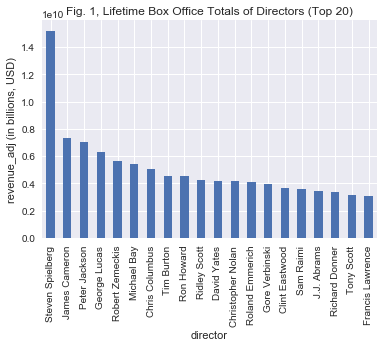

In [24]:
df2= df.groupby('director') #creating a new sub dataframe grouped by director 
%matplotlib inline
import matplotlib.pyplot as plt #importing matplotlib
total_bo = df2.revenue_adj.sum().sort_values(ascending=False).head(20) #summing the box office totals of all films for each director and assigning top 20 to 'total_bo' 
total_bo.plot(x='director', y='revenue_adj', kind ='bar') #plotting total box office revenue for top 20 directors
plt.ylabel("revenue_adj (in billions, USD)")
plt.title("Fig. 1, Lifetime Box Office Totals of Directors (Top 20)")
plt.gca().get_yaxis().get_major_formatter().set_scientific(True)# removing scientific notation
# plt.ticklabel_format(style='plain', axis='y')

As we can see, Steven Speilberg leads the pack with 14+ billion USD, followed by James Cameron, Peter Jackson and Geroge Lucas with 6-7.5 billion USD. Now let's calcualte the average box office revenues and see if we get different directors. 

In [8]:
avg_bo= df2.revenue_adj.mean().sort_values(ascending=False).head(20)#calculating the box office averages for each director and assigning top 20 to 'avg_bo'
avg_bo

director
Clyde Geronimi,Hamilton Luske,Wolfgang Reitherman    1.574815e+09
Roger Allers,Rob Minkoff                             1.159592e+09
Kyle Balda,Pierre Coffin                             1.064192e+09
Lee Unkrich                                          1.063172e+09
Andrew Adamson,Kelly Asbury,Conrad Vernon            1.061904e+09
George Lucas                                         1.052320e+09
David Yates                                          1.044364e+09
Andrew Stanton,Lee Unkrich                           1.024887e+09
Joss Whedon                                          9.264080e+08
Chris Miller,Raman Hui                               8.402392e+08
James Cameron                                        8.141357e+08
Pete Docter                                          7.854116e+08
Bob Peterson,Pete Docter                             7.433371e+08
Pierre Coffin,Chris Renaud                           7.260897e+08
Eric Darnell,Tom McGrath,Conrad Vernon               7.093842e+08
R

We can see that the directors' combined effort is recorded as one occurance. So let's create a sub dataframe(df3) where we split these and have them seperate

In [9]:
df3=pd.concat([pd.Series(row['revenue_adj'], row['director'].split(','))#creating a new sub dataframe and splitting multiple directors in a single row to seperate rows              
                    for _, row in df.iterrows()]).reset_index()
df3.columns=['director', 'revenue_adj'] #setting column names
df3.sort_values(by='revenue_adj', ascending=False) #sorting by 'revenue_adj' in descending order

,director,revenue_adj
1402,James Cameron,2827123750
1341,George Lucas,2789712242
5159,James Cameron,2506405735
10455,William Friedkin,2167324901
9650,Steven Spielberg,1907005841
3,J.J. Abrams,1902723129
8740,Steven Spielberg,1791694309
7970,Irwin Winkler,1583049536
9961,Hamilton Luske,1574814739
9962,Wolfgang Reitherman,1574814739


Now let's plot the directors' average box office totals(of top 20 directors)

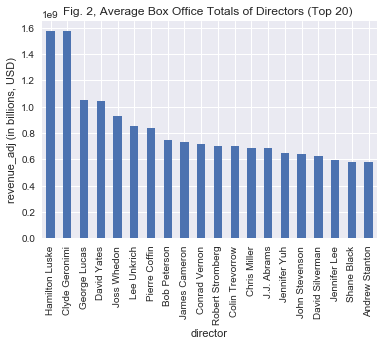

In [29]:
avg_bo_corrected=df3.groupby('director', as_index=False, sort=False)['revenue_adj'].mean().sort_values(by='revenue_adj', ascending=False).head(20)
#average box office totals for top 20 directors
avg_bo_corrected.plot(x='director', y='revenue_adj', kind ='bar') #plotting average box office totals for top 20 directors
plt.ylabel("revenue_adj (in billions, USD)")
plt.title("Fig. 2, Average Box Office Totals of Directors (Top 20) ")
plt.legend().set_visible(False) #removing legend

### Conclusion:
As we can see from Fig. 2, the average box office list of top directors is dominated by one-two film directors like Hamilton Luske, Joss Whedon and is not a better predictor of a director's potential at the box office. Hence, it is reasonable to assume that __total box office earnings__(Fig. 1) gives a better picture. We can conclude, based on our analysis, that __Steven Speilberg, James Cameron, Peter Jackson__ and __Geroge Lucas'__ films made more money at the box office. 

The drawback of this analysis is that, the films' box office earnings doesn't reveal how much money these directors' films make for their respective studios. A film is considered successful only if it makes more money for it's studios/production companies than the amount they invested. And this involves taking in to account of the production budget(budget_adj), distribution and marketing costs, studios' share of gross (stateside and overseas) and other complex hollywood accounting techniques which are beyond the scope of this dataset and analysis.

Now moving on to Q2: Is popularity on TMDB('popularity' and 'vote_count'), a predictor of the film's performance?

Let's plot a scatter plot and fit a regression model to see if there's any corelation between 'revenue_adj' and 'vote_count'/'popularity' using seaborn

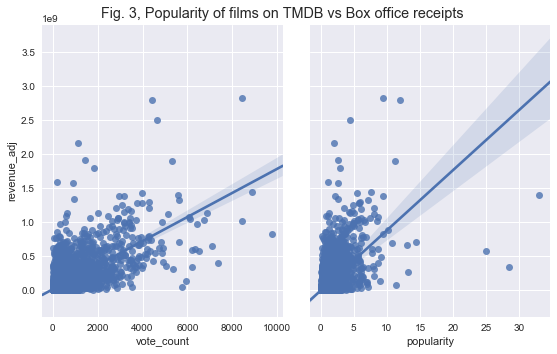

In [11]:
import seaborn as sns #importing seaborn
sns.pairplot(df, x_vars=["vote_count", "popularity"], y_vars=["revenue_adj"],
             size=5, aspect=.8, kind="reg").fig.suptitle('Fig. 3, Popularity of films on TMDB vs Box office receipts')
#plotting 'vote_count' and 'popularity' vs 'revenue_adj' 
plt.subplots_adjust(top=0.93) #adjusting title location

### Conclusion:
We can see from these plots that there is a positive trend between popularity of a film(vote count, popularity score) and the revenue earned. We can conclude that there is a __positive correlation__ between popularity of a film and the revenue earned. However, correlation does not mean causation. Hence based on our analysis, we cannot say that the revenue earned by a film is based on vote count and popularity score on TMDB.  

A multi-variate linear regression analysis based on a Machine learning model will be able to predict the value of one or more responses from a set of predictors more accurately.

### Limitations of the dataset:
The TMDB data set we analyzed has few shortcomings:

1. This dataset represents data from only the TMDB website which is a "user editable database"- as mentioned on their website. We're not sure if it's the most popular/authentic movie website which is representative of the general population. For example, the IMDB(Internet Movie Database) might be more popular and has a bigger user base than TMDB. 

2. The authenticity of the data is in question - as we are not sure of the sources from where they compile this data. There are other dedicated websites compiling box office totals like Boxofficemojo whose data is more authentic.

3. We are not sure how the totals are adjusted for inflation.

4. Old movies are not fairly represented, understandably, as they were made before the pre-internet era. For example, a classic and a very successful film like Jaws(1975) has much fewer votes than a movie that most people hate: Twilight(2008).

5. The dataset does not contain data for movies released before 1960. 
6. The budget and revnue totals, directors for some movies are missing.